In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower
import matplotlib as mpl

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
from pandas.plotting import parallel_coordinates

In [3]:
df = pd.read_csv("D:/Download/ikea.csv")
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [13]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [14]:
df.isna().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
# Count the median value for depth for each categories
median_depth = df.groupby(['category'])['depth'].median().reset_index()
median_depth.columns = ['category', 'MedianDepth']

# Count the median value for height for each categories
median_height = df.groupby(['category'])['height'].median().reset_index()
median_height.columns = ['category', 'MedianHeight']

# Count the median value for width for each categories
median_width = df.groupby(['category'])['width'].median().reset_index()
median_width.columns = ['category', 'MedianWidth']

# Create new dataframe that contain the median for each dimensions, from each categories
median_size = pd.merge(pd.merge(median_depth,median_height,on='category'),
median_width,on='category')
median_size

,category,MedianDepth,MedianHeight,MedianWidth
0,Bar furniture,47.0,102.0,48.0
1,Beds,88.0,84.0,140.0
2,Bookcases & shelving units,36.0,147.0,81.0
3,Cabinets & cupboards,38.0,101.0,80.0
4,Café furniture,46.5,77.5,53.0
5,Chairs,53.5,77.0,67.0
6,Chests of drawers & drawer units,47.0,73.0,67.0
7,Children's furniture,45.0,67.0,56.0
8,Nursery furniture,44.0,86.5,60.0
9,Outdoor furniture,67.0,73.0,62.5


In [17]:
# Merge the median dataframe with existing dataframe
df = pd.merge(df,median_size,on='category')

# Fill the null values in each dimension column, 
# with the average median value
df['depth'] = df['depth'].fillna(df['MedianDepth'])
df['height'] = df['height'].fillna(df['MedianHeight'])
df['width'] = df['width'].fillna(df['MedianWidth'])

In [18]:
df.isna().sum()

item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
MedianDepth          0
MedianHeight         0
MedianWidth          0
dtype: int64

In [19]:
df.drop(['MedianDepth', 'MedianHeight', 'MedianWidth'], 
        axis= 'columns', inplace = True)

In [20]:
df['volume'] = df['depth'] * df['height'] * df['width']

In [21]:
# Find out the value in old_price column
df['old_price'].values

array(['No old price', 'No old price', 'No old price', ..., 'SR 1,050',
       'SR 3,130', 'SR 1,535'], dtype=object)

In [22]:
# Create the fix_old_price function
def fix_old_price(df):
    
    # fill in price to old_price for No old price
    if df['old_price']  == 'No old price':
        return df['price']

    # remove SR and , from old_price
    elif df['old_price'][-4:] != 'pack':
        return float(str(df['old_price'])[3:].replace(',',''))
        
    else:
        return np.nan

# create new column price_diff, to help identified is there any different 
# between price with old_price
df['price_diff'] = (df['old_price'] != 'No old price').astype(int)

# apply the function
df['old_price'] = df.apply(fix_old_price, axis=1)
df[['price', 'old_price']].head()

,price,old_price
0,265.0,265.0
1,995.0,995.0
2,2095.0,2095.0
3,69.0,69.0
4,225.0,225.0


In [23]:
df.isna().sum()

item_id               0
name                  0
category              0
price                 0
old_price            10
sellable_online       0
link                  0
other_colors          0
short_description     0
designer              0
depth                 0
height                0
width                 0
volume                0
price_diff            0
dtype: int64

In [24]:
# Fill the old_price column with null values with price
df['old_price'] = df['old_price'].fillna(df['price'])

In [25]:
# Create column to calculate the different amount between price and old_price
df['diff_amount'] = df['old_price'] - df['price']

In [26]:
df.isna().sum()

item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
volume               0
price_diff           0
diff_amount          0
dtype: int64

<Axes: >

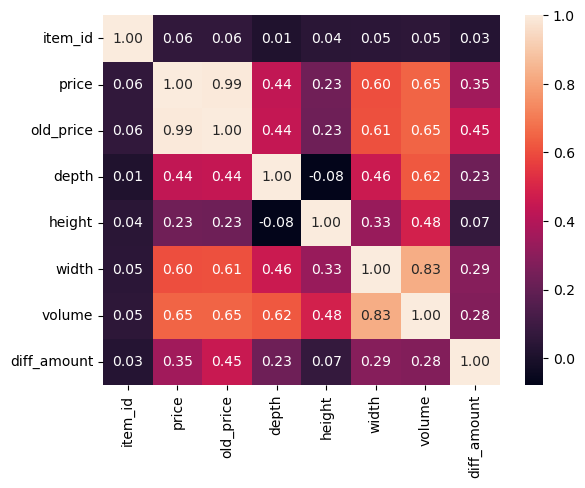

In [27]:
# Create correlation Heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_cols.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

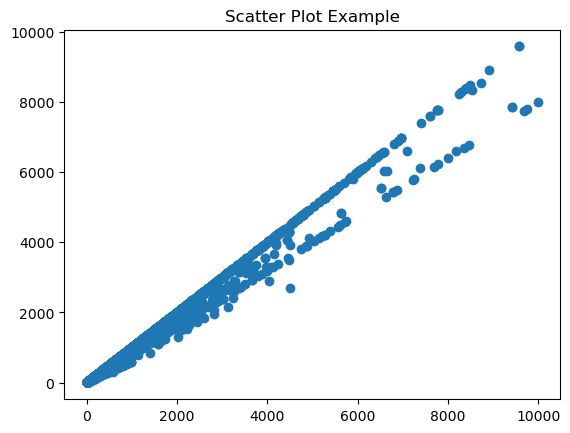

In [28]:
import matplotlib.pyplot as plt

# Sample data for x and y coordinates
x = df["old_price"]
y = df["price"]

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title

plt.title("Scatter Plot Example")

# Show the plot
plt.show()


In [29]:
df.describe()

,item_id,price,old_price,depth,height,width,volume,price_diff,diff_amount
count,3.694000e+03,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3.694000e+03,3694.000000,3694.000000
mean,4.863240e+07,1078.208419,1125.014348,55.880211,98.524228,105.420953,7.058127e+05,0.177044,46.805929
std,2.888709e+07,1374.652494,1443.543124,26.683012,55.201894,68.800229,9.146756e+05,0.381757,170.552565
min,5.848700e+04,3.000000,3.000000,1.000000,1.000000,1.000000,4.000000e+01,0.000000,0.000000
25%,2.039057e+07,180.900000,195.000000,40.000000,73.000000,60.000000,2.042400e+05,0.000000,0.000000
50%,4.928808e+07,544.700000,550.000000,46.500000,80.000000,80.000000,3.072000e+05,0.000000,0.000000
75%,7.040357e+07,1429.500000,1495.000000,65.000000,105.000000,141.000000,8.640000e+05,0.000000,0.000000
max,9.993262e+07,9585.000000,9985.000000,257.000000,700.000000,420.000000,1.362900e+07,1.000000,1997.000000


In [30]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,volume,price_diff,diff_amount
0,90420332,FREKVENS,Bar furniture,265.0,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,47.0,99.0,51.0,237303.0,0,0.0
1,368814,NORDVIKEN,Bar furniture,995.0,995.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,47.0,105.0,80.0,394800.0,0,0.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,47.0,102.0,48.0,230112.0,0,0.0
3,80155205,STIG,Bar furniture,69.0,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,300000.0,0,0.0
4,30180504,NORBERG,Bar furniture,225.0,225.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,190920.0,0,0.0


In [31]:
from sklearn.preprocessing import LabelEncoder
df_categoricals = df[['name','category','sellable_online','other_colors','designer']]
col = list(df_categoricals)
df_categoricals[col] = df_categoricals[col].apply(LabelEncoder().fit_transform)

C:\Users\KAMDEO SINGH\AppData\Local\Temp\ipykernel_3260\3878006944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categoricals[col] = df_categoricals[col].apply(LabelEncoder().fit_transform)


In [32]:
df_numericals = df[['price','depth','height','width','volume','price_diff','diff_amount']]

In [33]:
df_update = pd.concat([df_categoricals, df_numericals], 
axis=1, join='inner')

df_update.head()

,name,category,sellable_online,other_colors,designer,price,depth,height,width,volume,price_diff,diff_amount
0,123,0,1,0,333,265.0,47.0,99.0,51.0,237303.0,0,0.0
1,387,0,0,0,163,995.0,47.0,105.0,80.0,394800.0,0,0.0
2,390,0,0,0,163,2095.0,47.0,102.0,48.0,230112.0,0,0.0
3,493,0,1,1,189,69.0,50.0,100.0,60.0,300000.0,0,0.0
4,380,0,1,0,310,225.0,60.0,43.0,74.0,190920.0,0,0.0


In [41]:
from sklearn.model_selection import train_test_split

feature = df_update.drop(columns='price')
target = df_update[['price']]

# First splitting: pretrain and test
feature_price_train, feature_price_test, target_price_train, target_price_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_price_train, feature_price_validation, target_price_train,target_price_validation = train_test_split(feature_price_train, target_price_train, test_size=0.20, random_state=42)



In [42]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_price_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,name,1.092192
2,category,1.084486
3,sellable_online,1.016534
4,other_colors,1.108256
5,designer,1.035342
6,depth,2.482708
7,height,2.029916
8,width,3.393267
9,volume,6.521976
10,price_diff,1.561410


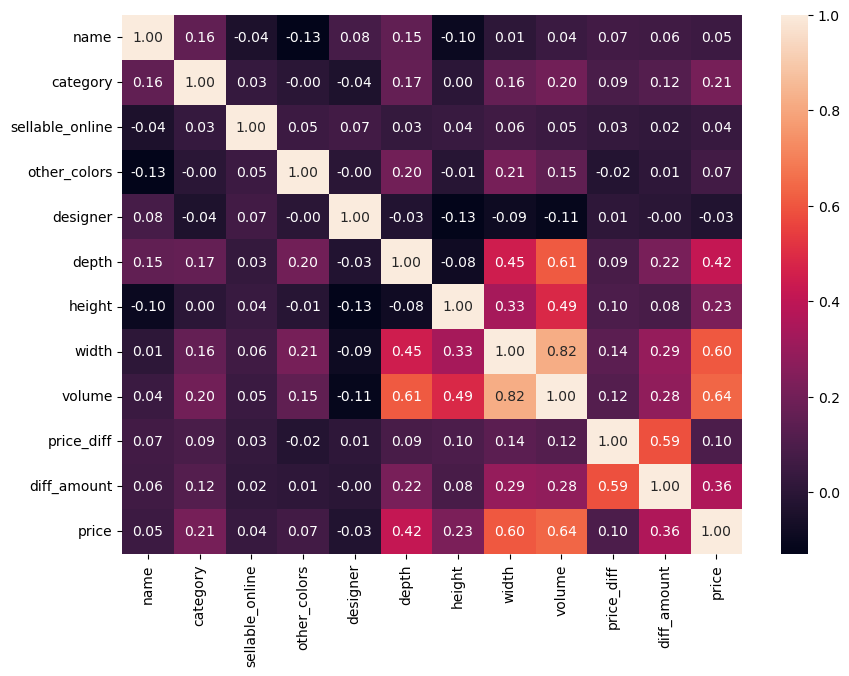

In [43]:
# heatmap correlation
price_train = pd.concat([feature_price_train, target_price_train], axis=1)
corr = price_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [44]:
# drop redundant features
feature_price_train = feature_price_train.drop(columns=['width', 
'height', 'depth'])
feature_price_validation = feature_price_validation.drop(columns=['width', 'height', 'depth'])
feature_price_test = feature_price_test.drop(columns=['width', 'height', 'depth'])

In [45]:
# Re-calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_price_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,name,1.057368
2,category,1.073175
3,sellable_online,1.013317
4,other_colors,1.045568
5,designer,1.029042
6,volume,1.168960
7,price_diff,1.538380
8,diff_amount,1.642156


In [46]:
from sklearn.linear_model import Ridge

# train the model
X_price_train = feature_price_train.to_numpy()
y_price_train = target_price_train.to_numpy()
y_price_train = y_price_train.reshape(len(y_price_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_price_train, y_price_train)
ridge_reg_pointone.fit(X_price_train, y_price_train)
ridge_reg_one.fit(X_price_train, y_price_train)
ridge_reg_ten.fit(X_price_train, y_price_train)

Ridge(alpha=10, random_state=42)

In [47]:
# Calculate the best lambda value
from sklearn.metrics import mean_squared_error

X_price_validation = feature_price_validation.to_numpy()
y_price_validation = target_price_validation.to_numpy()
y_price_validation = y_price_validation.reshape(len(y_price_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_price_validation)
    rmse = np.sqrt(mean_squared_error(y_price_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 987.252730825766
RMSE of Ridge regression model with alpha = 0.1 is 987.2517050840987
RMSE of Ridge regression model with alpha = 1.0 is 987.2418462723093
RMSE of Ridge regression model with alpha = 10 is 987.1705130199575


In [48]:
# Calculate the Pricbe Prediction Model for Ridge Regression
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_price_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,97.781584
1,name,0.003576
2,category,21.064593
3,sellable_online,68.721860
4,other_colors,-58.972591
5,designer,0.692772
6,volume,0.000841
7,price_diff,-463.483432
8,diff_amount,2.067444


In [50]:
from sklearn.linear_model import Lasso

# train the model
X_price_train = feature_price_train.to_numpy()
y_price_train = target_price_train.to_numpy()
y_price_train = y_price_train.reshape(len(y_price_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_price_train, y_price_train)
lasso_reg_pointone.fit(X_price_train, y_price_train)
lasso_reg_one.fit(X_price_train, y_price_train)
lasso_reg_ten.fit(X_price_train, y_price_train)

Lasso(alpha=10, random_state=42)

In [51]:
# Calculate the best lambda value
from sklearn.metrics import mean_squared_error

X_price_validation = feature_price_validation.to_numpy()
y_price_validation = target_price_validation.to_numpy()
y_price_validation = y_price_validation.reshape(len(y_price_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_price_validation)
    rmse = np.sqrt(mean_squared_error(y_price_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 987.252465278707
RMSE of Lasso regression model with alpha = 0.1 is 987.2500761521386
RMSE of Lasso regression model with alpha = 1.0 is 987.2825197186934
RMSE of Lasso regression model with alpha = 10 is 987.5125295988879


In [52]:
# Calculate the Price Prediction Model for Lasso Regression
lasso_best = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_price_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,71.844397
1,name,0.005163
2,category,21.085834
3,sellable_online,97.688536
4,other_colors,-60.026131
5,designer,0.691070
6,volume,0.000841
7,price_diff,-483.308350
8,diff_amount,2.093324


In [67]:
print('Lasso regression train score: ',lasso_best.score(X_price_train, y_price_train))
print('Lasso regression train score: ',lasso_best.score(X_price_test, y_price_test))

Lasso regression train score:  0.4612441420299006
Lasso regression train score:  0.46026027124895563


In [53]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_price_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_price_train, 
y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_price_train, 
y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_price_train, 
y_predict_train)))

RMSE for training data is 998.6901837298269
MAE for training data is 654.1170892121919
MAPE for training data is 3.598525426473168


In [54]:
# Testing Error

# prepare prediction result on test data
X_price_test = feature_price_test.to_numpy()
y_predict_test = ridge_best.predict(X_price_test)

# ground truth target
y_price_test = target_price_test.to_numpy()
y_price_test = y_price_test.reshape(len(y_price_test),)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_price_test, 
y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_price_test, 
y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_price_test, 
y_predict_test)))

RMSE for testing data is 1019.9781385549287
MAE for testing data is 654.3331930612878
MAPE for testing data is 4.249702968219503


In [42]:
# prepare prediction result on training data
y_predict_train = lasso_best.predict(X_price_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_price_train, 
y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_price_train, 
y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_price_train, 
y_predict_train)))

RMSE for training data is 998.6638772559531
MAE for training data is 654.4635527199952
MAPE for training data is 3.6049379799109906


In [43]:
# prepare prediction result on test data
X_price_test = feature_price_test.to_numpy()
y_predict_test = lasso_best.predict(X_price_test)

# ground truth target
y_price_test = target_price_test.to_numpy()
y_price_test = y_price_test.reshape(len(y_price_test),)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_price_test, 
y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_price_test, 
y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_price_test, 
y_predict_test)))

RMSE for testing data is 1019.9710520387994
MAE for testing data is 654.9349302761653
MAPE for testing data is 4.263537130230901


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
x=feature_price_train.to_numpy()
y=target_price_validation.to_numpy()


NameError: name 'feature_price_train' is not defined

In [57]:
models = []
models.append(('Linear', LinearRegression()))
models.append(('Ridge',Ridge(random_state=1)))
models.append(('Lasso',Lasso(random_state=1)))
models.append(('Decision Tree', DecisionTreeRegressor(random_state=1)))
models.append(('Random Forest', RandomForestRegressor(random_state=1)))

result = []
names = []

for name, model in models:
    model.fit(X_price_train,y_price_train)
    score = model.score(X_price_train,y_price_train)
    test_score = model.score(X_price_test,y_price_test)
    result.append(score)
    print('{}: Train {}, Test {}'.format(name,score,test_score))

Linear: Train 0.46124501038709875, Test 0.4602591323491647
Ridge: Train 0.4612446077982958, Test 0.4602599941481593
Lasso: Train 0.4611890128397125, Test 0.4602417730606946
Elastic net: Train 0.45249527433447156, Test 0.45300407561233613
Decision Tree: Train 0.989787160053646, Test 0.6041600365931901
Random Forest: Train 0.9605463311195929, Test 0.795392791170081


In [58]:
print('RMSE Scores for the models\n')
for name, model in models:
    model.fit(X_price_train,y_price_train)
    pred = model.predict(X_price_test)
    rmse = np.sqrt(mean_squared_error(y_price_test,pred))
    print('{}: {}'.format(name, rmse))

RMSE Scores for the models

Linear: 1019.9721281539557
Ridge: 1019.9713138638415
Lasso: 1019.9885303286856
Elastic net: 1026.8043459533076
Decision Tree: 873.4850410396554
Random Forest: 627.9949022946704


In [59]:
# Importing Algorithims 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Libraries for Comparision
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [62]:
print('MAE Scores for the models\n')
for name, model in models:
    model.fit(X_price_train,y_price_train)
    pred = model.predict(X_price_test)
    mae = mean_absolute_error(y_price_test,pred)
    print('{}: {}'.format(name, mae))

MAE Scores for the models

Linear: 654.9919200450984
Ridge: 654.9122148173388
Lasso: 654.449142309584
Elastic net: 652.3295851622199
Decision Tree: 418.03603486049354
Random Forest: 336.7246936252881


In [64]:
print('MAPE Scores for the models\n')
for name, model in models:
    model.fit(X_price_train,y_price_train)
    pred = model.predict(X_price_test)
    mape = mean_absolute_percentage_error(y_price_test,pred)
    print('{}: {}'.format(name, mape))

MAPE Scores for the models

Linear: 4.262999331832658
Ridge: 4.261787257514905
Lasso: 4.265186348253148
Elastic net: 4.051643306397287
Decision Tree: 1.312025797234061
Random Forest: 1.3179193250672914
